# Uvod

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = 'drive/MyDrive/Fax stuff/FER stuff/UuZOP/heart_disease_uci_new.csv'
df = pd.read_csv(path)

In [ ]:
df.set_index('id', inplace = True)

In [ ]:
df.tail()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,sex_Female,sex_Male
id,,,,,,,,,,,,,
916,54,0,127.000000,333.0,1.0,2,154.000000,0.0,0.000000,1.0,1,1.0,0.0
917,62,3,132.132404,139.0,0.0,2,137.545665,0.0,0.878788,0.0,0,0.0,1.0
918,55,0,122.000000,223.0,1.0,2,100.000000,0.0,0.000000,0.0,2,0.0,1.0
919,58,0,132.132404,385.0,1.0,0,137.545665,1.0,0.878788,1.0,0,0.0,1.0
920,62,1,120.000000,254.0,0.0,0,93.000000,1.0,0.000000,2.0,1,0.0,1.0


"This research used five different models to predict the
heart disease using collected dataset."

  - Decision Tree
  - Naive Bayes
  - Random Forest
  - Logistic Regresion
  - SVM

"To avoid similar values selection during model learning and
testing phase, 10-fold Cross Validation operator was used."

In [ ]:
df['num'].value_counts()

0    411
1    263
2    109
3    107
4     28
Name: num, dtype: int64

In [ ]:
df['num'] = df['num'].replace([1,2,3,4], 1)
df['num'].value_counts()

1    507
0    411
Name: num, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 1 to 920
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         918 non-null    int64  
 1   cp          918 non-null    int64  
 2   trestbps    918 non-null    float64
 3   chol        918 non-null    float64
 4   fbs         918 non-null    float64
 5   restecg     918 non-null    int64  
 6   thalch      918 non-null    float64
 7   exang       918 non-null    float64
 8   oldpeak     918 non-null    float64
 9   slope       918 non-null    float64
 10  num         918 non-null    int64  
 11  sex_Female  918 non-null    float64
 12  sex_Male    918 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 100.4 KB


In [ ]:
df_2 = df.copy()
y = df_2[['num']].values.ravel()
df_2.drop('num', axis = 1, inplace = True)
X = df_2

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Treniranje i testiranje modela uz standardizirane podatke

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
stds = StandardScaler()
X[['trestbps', 'chol', 'thalch']] = stds.fit_transform(X[['trestbps', 'chol', 'thalch']])
X.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,sex_Female,sex_Male
id,,,,,,,,,,,,
1,63,3,0.709471,-0.060293,1.0,0,0.495922,0.0,2.3,0.0,0.0,1.0
2,67,0,1.546535,0.897672,0.0,0,-1.174307,1.0,1.5,1.0,0.0,1.0
3,67,0,-0.685635,-0.132592,0.0,0,-0.339193,1.0,2.6,1.0,0.0,1.0
4,37,2,-0.127593,0.246979,0.0,1,1.967313,0.0,3.5,0.0,0.0,1.0
5,41,1,-0.127593,-0.584462,0.0,0,1.370803,0.0,1.4,2.0,1.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
tree.fit(X_train, y_train)
kfold = KFold(n_splits = 10)
scores = cross_val_score(tree, X_train, y_train, cv = kfold)
pred = tree.predict(X_test)
print("Točnost modela: ", accuracy_score(y_test, pred))
print("Prosječna točnost treniranja modela K-fold provjerom: ", np.mean(scores))

Točnost modela:  0.7282608695652174
Prosječna točnost treniranja modela K-fold provjerom:  0.7356349500185118


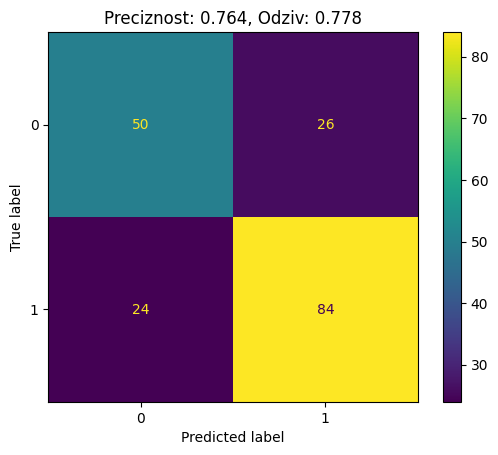

In [ ]:
cm = confusion_matrix(y_test, pred ,labels = tree.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= tree.classes_).plot()
plt.title('Preciznost: {}, Odziv: {}'.format(np.round(cm[1,1]/(cm[1,1]+cm[0,1]),3), np.round(cm[1,1]/(cm[1,1]+cm[1,0]),3)))
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB().fit(X_train, y_train.reshape(734,-1))
scores = cross_val_score(bayes, X_train, y_train, cv = kfold)
pred = bayes.predict(X_test)
print("Točnost modela: ", accuracy_score(y_test, pred))
print("Prosječna točnost treniranja modela K-fold provjerom: ", np.mean(scores))

Točnost modela:  0.7282608695652174
Prosječna točnost treniranja modela K-fold provjerom:  0.7846538319141059


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


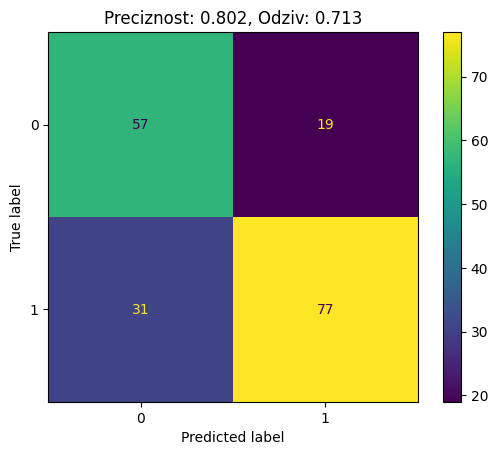

In [ ]:
cm_b = confusion_matrix(y_test, pred ,labels = bayes.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm_b, display_labels= bayes.classes_).plot()
plt.title('Preciznost: {}, Odziv: {}'.format(np.round(cm_b[1,1]/(cm_b[1,1]+cm_b[0,1]),3), np.round(cm_b[1,1]/(cm_b[1,1]+cm_b[1,0]),3)))
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = "entropy", max_depth = 5)
forest.fit(X_train, y_train)
scores = cross_val_score(forest, X_train, y_train, cv = kfold)
pred = forest.predict(X_test)
print("Točnost modela: ", accuracy_score(y_test, pred))
print("Prosječna točnost treniranja modela K-fold provjerom: ", np.mean(scores))

Točnost modela:  0.7880434782608695
Prosječna točnost treniranja modela K-fold provjerom:  0.8022584228063682


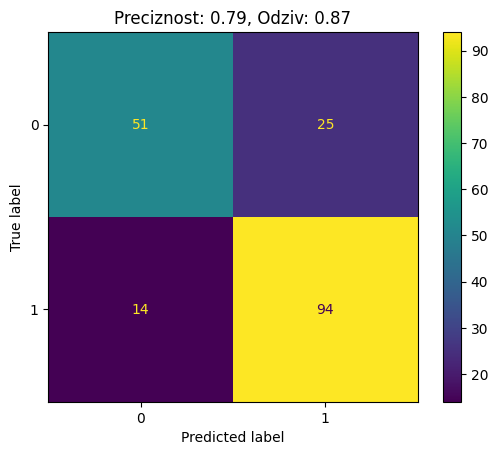

In [ ]:
cm_f = confusion_matrix(y_test, pred ,labels = forest.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm_f, display_labels= forest.classes_).plot()
plt.title('Preciznost: {}, Odziv: {}'.format(np.round(cm_f[1,1]/(cm_f[1,1]+cm_f[0,1]),3), np.round(cm_f[1,1]/(cm_f[1,1]+cm_f[1,0]),3)))
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cholesky').fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv = kfold)
pred = logreg.predict(X_test)
print("Točnost modela: ", accuracy_score(y_test, pred))
print("Prosječna točnost treniranja modela K-fold provjerom: ", np.mean(scores))

Točnost modela:  0.7554347826086957
Prosječna točnost treniranja modela K-fold provjerom:  0.7914105886708627


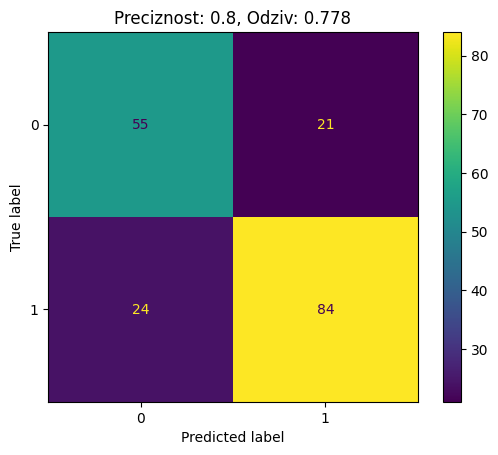

In [ ]:
cm_lr = confusion_matrix(y_test, pred ,labels = logreg.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels= logreg.classes_).plot()
plt.title('Preciznost: {}, Odziv: {}'.format(np.round(cm_lr[1,1]/(cm_lr[1,1]+cm_lr[0,1]),3), np.round(cm_lr[1,1]/(cm_lr[1,1]+cm_lr[1,0]),3)))
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf').fit(X_train, y_train)
scores = cross_val_score(svm, X_train, y_train, cv = kfold)
pred = svm.predict(X_test)
print("Točnost modela: ", accuracy_score(y_test, pred))
print("Prosječna točnost treniranja modela K-fold provjerom: ", np.mean(scores))

Točnost modela:  0.6847826086956522
Prosječna točnost treniranja modela K-fold provjerom:  0.675768233987412


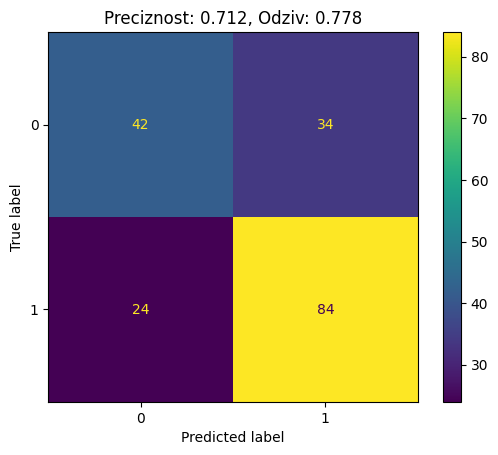

In [ ]:
cm_svm = confusion_matrix(y_test, pred ,labels = svm.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels= svm.classes_).plot()
plt.title('Preciznost: {}, Odziv: {}'.format(np.round(cm_svm[1,1]/(cm_svm[1,1]+cm_svm[0,1]),3), np.round(cm_svm[1,1]/(cm_svm[1,1]+cm_svm[1,0]),3)))
plt.show()

# Treniranje i testiranje modela uz normalizirane podatke

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler(copy = False)
X[['trestbps', 'chol', 'thalch']] = minmax.fit_transform(X[['trestbps', 'chol', 'thalch']])
X.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,sex_Female,sex_Male
id,,,,,,,,,,,,
1,63,3,0.541667,0.285714,1.0,0,0.633803,0.0,2.3,0.0,0.0,1.0
2,67,0,0.666667,0.388031,0.0,0,0.338028,1.0,1.5,1.0,0.0,1.0
3,67,0,0.333333,0.277992,0.0,0,0.485915,1.0,2.6,1.0,0.0,1.0
4,37,2,0.416667,0.318533,0.0,1,0.894366,0.0,3.5,0.0,0.0,1.0
5,41,1,0.416667,0.229730,0.0,0,0.788732,0.0,1.4,2.0,1.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
tree.fit(X_train, y_train)
kfold = KFold(n_splits = 10)
scores = cross_val_score(tree, X_train, y_train, cv = kfold)
pred = tree.predict(X_test)
print("Točnost modela: ", accuracy_score(y_test, pred))
print("Prosječna točnost treniranja modela K-fold provjerom: ", np.mean(scores))

Točnost modela:  0.7717391304347826
Prosječna točnost treniranja modela K-fold provjerom:  0.7343576453165495


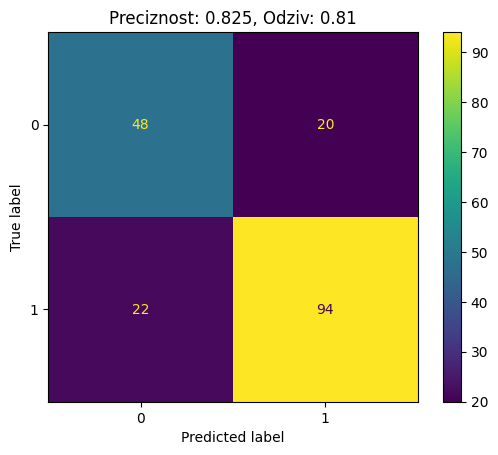

In [ ]:
cm = confusion_matrix(y_test, pred ,labels = tree.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= tree.classes_).plot()
plt.title('Preciznost: {}, Odziv: {}'.format(np.round(cm[1,1]/(cm[1,1]+cm[0,1]),3), np.round(cm[1,1]/(cm[1,1]+cm[1,0]),3)))
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB().fit(X_train, y_train)
scores = cross_val_score(bayes, X_train, y_train, cv = kfold)
pred = bayes.predict(X_test)
print("Točnost modela: ", accuracy_score(y_test, pred))
print("Prosječna točnost treniranja modela K-fold provjerom: ", np.mean(scores))

Točnost modela:  0.7771739130434783
Prosječna točnost treniranja modela K-fold provjerom:  0.7668826360607182


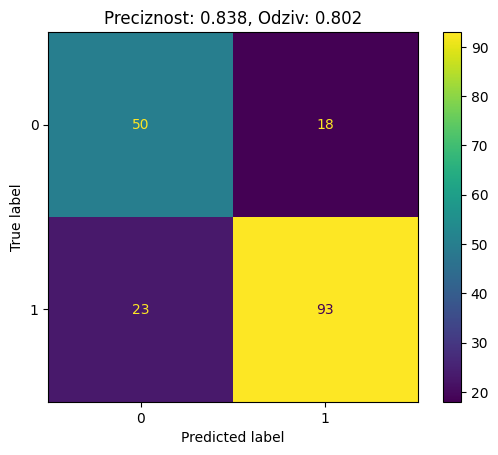

In [ ]:
cm_b = confusion_matrix(y_test, pred ,labels = bayes.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm_b, display_labels= bayes.classes_).plot()
plt.title('Preciznost: {}, Odziv: {}'.format(np.round(cm_b[1,1]/(cm_b[1,1]+cm_b[0,1]),3), np.round(cm_b[1,1]/(cm_b[1,1]+cm_b[1,0]),3)))
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = "entropy", max_depth = 5)
forest.fit(X_train, y_train)
scores = cross_val_score(forest, X_train, y_train, cv = kfold)
pred = forest.predict(X_test)
print("Točnost modela: ", accuracy_score(y_test, pred))
print("Prosječna točnost treniranja modela K-fold provjerom: ", np.mean(scores))

Točnost modela:  0.8260869565217391
Prosječna točnost treniranja modela K-fold provjerom:  0.8010921880784896


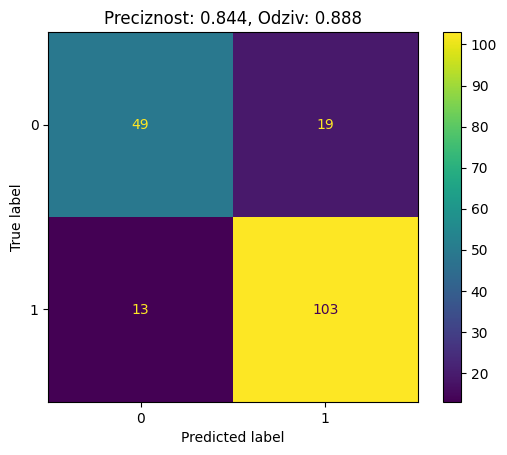

In [ ]:
cm_f = confusion_matrix(y_test, pred ,labels = forest.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm_f, display_labels= forest.classes_).plot()
plt.title('Preciznost: {}, Odziv: {}'.format(np.round(cm_f[1,1]/(cm_f[1,1]+cm_f[0,1]),3), np.round(cm_f[1,1]/(cm_f[1,1]+cm_f[1,0]),3)))
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cholesky').fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv = kfold)
pred = logreg.predict(X_test)
print("Točnost modela: ", accuracy_score(y_test, pred))
print("Prosječna točnost treniranja modela K-fold provjerom: ", np.mean(scores))

Točnost modela:  0.8097826086956522
Prosječna točnost treniranja modela K-fold provjerom:  0.7833580155497963


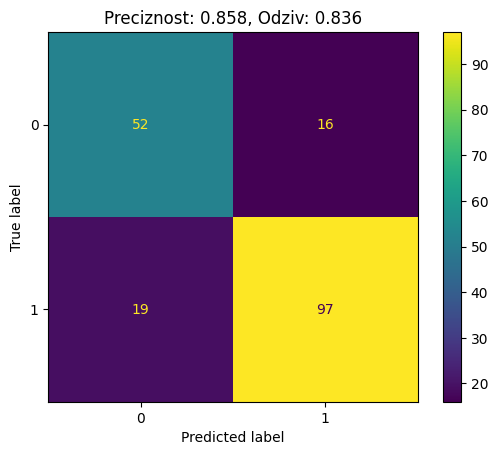

In [ ]:
cm_lr = confusion_matrix(y_test, pred ,labels = logreg.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels= logreg.classes_).plot()
plt.title('Preciznost: {}, Odziv: {}'.format(np.round(cm_lr[1,1]/(cm_lr[1,1]+cm_lr[0,1]),3), np.round(cm_lr[1,1]/(cm_lr[1,1]+cm_lr[1,0]),3)))
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf').fit(X_train, y_train)
scores = cross_val_score(svm, X_train, y_train, cv = kfold)
pred = svm.predict(X_test)
print("Točnost modela: ", accuracy_score(y_test, pred))
print("Prosječna točnost treniranja modela K-fold provjerom: ", np.mean(scores))

Točnost modela:  0.7663043478260869
Prosječna točnost treniranja modela K-fold provjerom:  0.6471677156608664


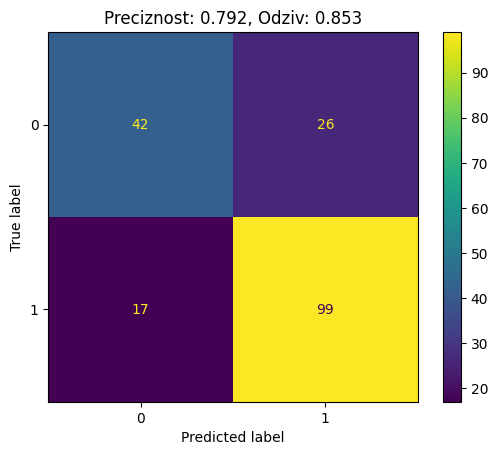

In [ ]:
cm_svm = confusion_matrix(y_test, pred ,labels = svm.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels= svm.classes_).plot()
plt.title('Preciznost: {}, Odziv: {}'.format(np.round(cm_svm[1,1]/(cm_svm[1,1]+cm_svm[0,1]),3), np.round(cm_svm[1,1]/(cm_svm[1,1]+cm_svm[1,0]),3)))
plt.show()